In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_analyst_jobs = pd.io.parsers.read_csv("DataAnalyst.csv")
type(data_analyst_jobs)

pandas.core.frame.DataFrame

In [2]:
data_analyst_jobs

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [43]:
# dropping columns that not use
jobs=data_analyst_jobs
jobs=jobs.drop(['Unnamed: 0', 'Job Description','Salary Estimate','Founded','Type of ownership',
               'Competitors','Industry','Sector','Revenue','Size','Headquarters','Job Title'], axis=1)
jobs


,Rating,Company Name,Location,Easy Apply
0,3.2,Vera Institute of Justice\n3.2,"New York, NY",TRUE
1,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",-1
2,3.4,Squarespace\n3.4,"New York, NY",-1
3,4.1,Celerity\n4.1,"New York, NY",-1
4,3.9,FanDuel\n3.9,"New York, NY",TRUE
...,...,...,...,...
2248,2.5,"Avacend, Inc.\n2.5","Denver, CO",-1
2249,2.9,Arrow Electronics\n2.9,"Centennial, CO",-1
2250,-1.0,Spiceorb,"Denver, CO",-1
2251,3.1,Contingent Network Services\n3.1,"Centennial, CO",-1


In [44]:
#replacing -1 in Easy Apply to False (not hiring)
jobs["Easy Apply"].replace({"-1": "FALSE"}, inplace=True)
jobs

,Rating,Company Name,Location,Easy Apply
0,3.2,Vera Institute of Justice\n3.2,"New York, NY",TRUE
1,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",FALSE
2,3.4,Squarespace\n3.4,"New York, NY",FALSE
3,4.1,Celerity\n4.1,"New York, NY",FALSE
4,3.9,FanDuel\n3.9,"New York, NY",TRUE
...,...,...,...,...
2248,2.5,"Avacend, Inc.\n2.5","Denver, CO",FALSE
2249,2.9,Arrow Electronics\n2.9,"Centennial, CO",FALSE
2250,-1.0,Spiceorb,"Denver, CO",FALSE
2251,3.1,Contingent Network Services\n3.1,"Centennial, CO",FALSE


In [45]:
# replacing all null values to NaN (-1,1,0)
jobs=jobs.replace(-1,np.nan)
jobs=jobs.replace(-1.0,np.nan)
jobs=jobs.replace('-1',np.nan)
jobs

,Rating,Company Name,Location,Easy Apply
0,3.2,Vera Institute of Justice\n3.2,"New York, NY",TRUE
1,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",FALSE
2,3.4,Squarespace\n3.4,"New York, NY",FALSE
3,4.1,Celerity\n4.1,"New York, NY",FALSE
4,3.9,FanDuel\n3.9,"New York, NY",TRUE
...,...,...,...,...
2248,2.5,"Avacend, Inc.\n2.5","Denver, CO",FALSE
2249,2.9,Arrow Electronics\n2.9,"Centennial, CO",FALSE
2250,NaN,Spiceorb,"Denver, CO",FALSE
2251,3.1,Contingent Network Services\n3.1,"Centennial, CO",FALSE


In [46]:
#replacing space in column names with underscore
jobs.columns = jobs.columns.str.replace(' ','_')
#use str.split function to separate Company Name columns
jobs[['Company_Name','NaN']] = jobs.Company_Name.str.split("\n",expand=True,)
jobs

,Rating,Company_Name,Location,Easy_Apply,NaN
0,3.2,Vera Institute of Justice,"New York, NY",TRUE,3.2
1,3.8,Visiting Nurse Service of New York,"New York, NY",FALSE,3.8
2,3.4,Squarespace,"New York, NY",FALSE,3.4
3,4.1,Celerity,"New York, NY",FALSE,4.1
4,3.9,FanDuel,"New York, NY",TRUE,3.9
...,...,...,...,...,...
2248,2.5,"Avacend, Inc.","Denver, CO",FALSE,2.5
2249,2.9,Arrow Electronics,"Centennial, CO",FALSE,2.9
2250,NaN,Spiceorb,"Denver, CO",FALSE,None
2251,3.1,Contingent Network Services,"Centennial, CO",FALSE,3.1


In [47]:
#drop NaN column
jobs.drop(['NaN'], axis=1)

,Rating,Company_Name,Location,Easy_Apply
0,3.2,Vera Institute of Justice,"New York, NY",TRUE
1,3.8,Visiting Nurse Service of New York,"New York, NY",FALSE
2,3.4,Squarespace,"New York, NY",FALSE
3,4.1,Celerity,"New York, NY",FALSE
4,3.9,FanDuel,"New York, NY",TRUE
...,...,...,...,...
2248,2.5,"Avacend, Inc.","Denver, CO",FALSE
2249,2.9,Arrow Electronics,"Centennial, CO",FALSE
2250,NaN,Spiceorb,"Denver, CO",FALSE
2251,3.1,Contingent Network Services,"Centennial, CO",FALSE


In [48]:
#Creating a df with all the hiring companies grouby company name
hiring = jobs.loc[jobs['Easy_Apply'] == 'TRUE']
hiring = jobs.groupby('Company_Name')['Easy_Apply'].count().reset_index()

#Sort hiring companies in descending order and only show top 10 companies hiring 
hiring_1 = hiring.sort_values('Easy_Apply',ascending=False).head(10)
hiring_1

,Company_Name,Easy_Apply
1182,"Staffigo Technical Services, LLC",58
386,Diverse Lynx,22
759,Lorven Technologies Inc,19
705,Kforce,19
1070,Robert Half,14
825,Mondo,14
135,"Avacend, Inc.",13
102,Apple,10
99,Apex Systems,10
1484,eTeam Inc.,10


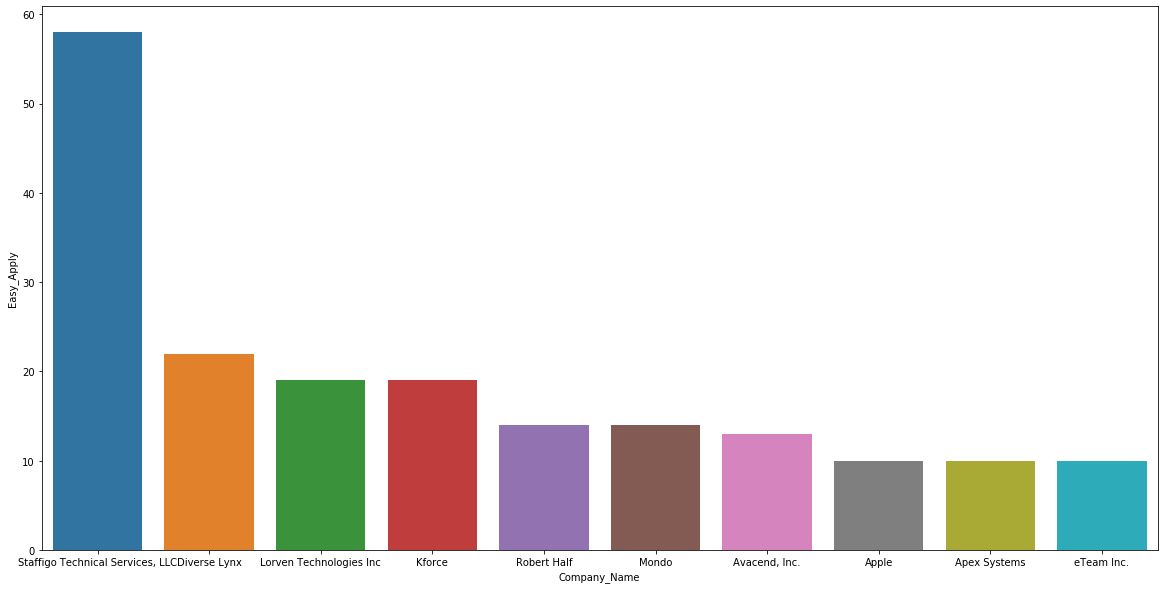

In [49]:
#creating a bar Graph by using seaborn 
import seaborn as sns

plt.figure(figsize=(20,10))
chart = sns.barplot(
    data=hiring_1,
    x='Company_Name',
    y='Easy_Apply')

In [50]:
#Using the group.by function for rating by counting total number of companies in each rating 
rating = jobs.groupby(['Company_Name','Rating','Easy_Apply'])['Easy_Apply'].count()
rating

Company_Name               Rating  Easy_Apply
1199SEIU Funds             3.2     FALSE         2
1872 Consulting            5.0     FALSE         1
22nd Century Staffing      4.3     TRUE          2
22nd Century Technologies  3.7     TRUE          5
2U                         3.5     TRUE          1
                                                ..
nana                       2.6     FALSE         1
pureIntegration            3.4     FALSE         1
silverXis inc              4.0     FALSE         1
thredUP                    3.9     FALSE         1
xentity corporation        5.0     FALSE         2
Name: Easy_Apply, Length: 1296, dtype: int64

In [51]:
#creating a df with rating and company name column and rename the company name to count.
rating1 = pd.DataFrame(rating).rename(columns={'Easy_Apply': 'Count'}).reset_index()
#sorting out the count with rating as descending order and only showing 10 highest
rating1 = rating1.sort_values('Count',ascending=False)
rating1 = rating1.loc[rating1['Easy_Apply'] == 'TRUE'].head(10)
rating1

,Company_Name,Rating,Easy_Apply,Count
81,Apex Systems,3.8,TRUE,10
3,22nd Century Technologies,3.7,TRUE,5
234,Chime,4.8,TRUE,3
988,Signify Health,3.6,TRUE,3
1097,Tempus Labs,3.2,TRUE,2
1168,Undertone,3.8,TRUE,2
2,22nd Century Staffing,4.3,TRUE,2
934,Royal Communications Consultants Inc,3.0,TRUE,1
1008,Spectrum Comm,3.8,TRUE,1
1026,Steady,3.6,TRUE,1


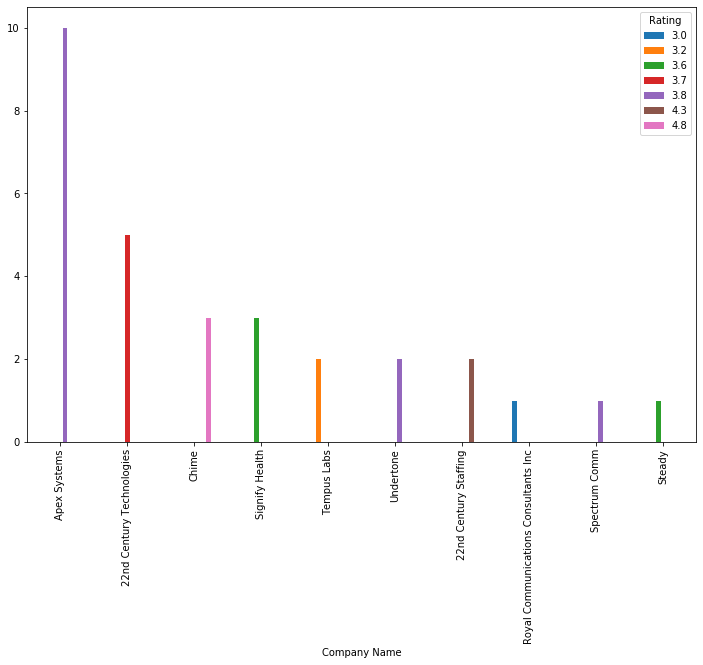

In [39]:
# performing a bar graph with company name rating and count by using pivot table function.
da=pd.DataFrame({
     'Company Name':['Apex Systems','22nd Century Technologies','Chime','Signify Health','Tempus Labs','Undertone','22nd Century Staffing','Royal Communications Consultants Inc','Spectrum Comm','Steady'],
     'Rating':['3.8','3.7','4.8','3.6','3.2','3.8','4.3','3.0','3.8','3.6'],
     'Count':[10,5,3,3,2,2,2,1,1,1]})

order = ['Apex Systems','22nd Century Technologies','Chime','Signify Health','Tempus Labs','Undertone','22nd Century Staffing','Royal Communications Consultants Inc','Spectrum Comm','Steady']
da.pivot('Company Name','Rating','Count').loc[order].plot(kind='bar',figsize=(12, 8))

From the data analysis above, Apenx Systems offers more job opportunities than others and Chima with 4.8 rating is also hiring.Finding the best jobs by company rating. Because of pandemic many people lost their jobs, with this data it is possible to filter out the best jobs so that more people can be employed.

In [52]:
#counting and sorting total number of Data Analytic jobs are offering in each location in descending order for top 10 location pie chart
location = jobs['Location'].value_counts()
location = pd.DataFrame(location)
location =location.sort_values('Location',ascending=False).head(10)
location


,Location
"New York, NY",310
"Chicago, IL",130
"San Francisco, CA",119
"Austin, TX",81
"Los Angeles, CA",80
"Charlotte, NC",78
"Houston, TX",72
"Dallas, TX",66
"San Diego, CA",62
"Philadelphia, PA",56


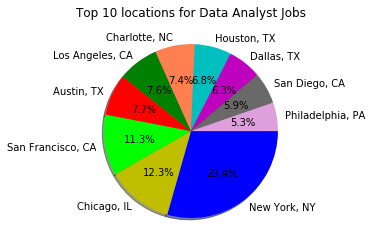

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt

# the portion you want to dedicate to each value
# for example for first one is 5 out of 43 makes it %11.6
values = [310, 130, 119, 81, 80, 78, 72, 66, 62, 56]
colors = ['b', 'y', 'lime', 'r', 'g', 'coral', 'c', 'm', 'dimgrey', 'plum']
labels = ['New York, NY', 'Chicago, IL', 'San Francisco, CA', 'Austin, TX', 'Los Angeles, CA', 'Charlotte, NC','Houston, TX','Dallas, TX','San Diego, CA','Philadelphia, PA']
# move the second value section out of the chart. The higher the number the farther it gets moved


# autopct the %.1f is Python formating and %% used to show as percent
plt.pie(values, colors=colors, labels=labels
        , autopct='%.1f%%',
        counterclock=False, shadow=True)
plt.title('Top 10 locations for Data Analyst Jobs')

plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

src = pd.io.parsers.read_csv("DataAnalyst.csv") #reads file


#calculating avg salary
def avg_sal(x):
    x = x.replace("(Glassdoor est.)","") #replaces glassdoor with nothing
    x = x.replace("$","") #replaces $ with nothing
    x = x.replace("K","000") #replaces K to make number numerical
    if x.find("0-")!=-1: #trys to find 0-, if it finds it sets average to 0, otherwise splits the two numbers using dash 
        avg = (int(x.split("-")[0])+int(x.split("-")[1]))/2 #adds and divides all the salary estimates to find average
    else:
        avg=0
    return avg

src["Average Salary"] = src["Salary Estimate"].apply(avg_sal) #applies average salary calculations from salary estimate into average salary data frame

In [16]:
src1 = src[["Rating", "Average Salary"]].copy() #copies rating and average salary to src1
src1 = src1.loc[(src1["Rating"]>0) & (src1["Average Salary"]>0)].copy() #Access a group of rows and columns where rating > 0 and Average Salary > 0

In [17]:
src1.corr() #Compute pairwise correlation 

#No correlation between salary and rating

,Rating,Average Salary
Rating,1.00000,0.04256
Average Salary,0.04256,1.00000


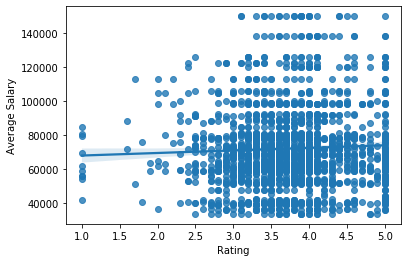

In [18]:
sns.regplot(data=src1,x="Rating",y="Average Salary")
plt.show()

#scatter plot shows weak or no relationship

In [19]:
# Create a dict of skills as keys and search patterns as values
hard_skills_dict = {
    'Python': r"python",
    'R': r"[\b\s/]r[\s,\.]",
    'Excel': r'excel', 
    'Tableau': r'tableau', 
    'SQL': r'sql', 
    'SAS': r'\bsas\b',
    'SPSS': r'\bSPSS\b',
    'VBA': r'\bvba\b',
    'PowerBI': r'power[\s]BI',
    'PowerQuery': r'power[\s]query',
    'SAP': r"\bSAP\b",
    'AWS': r"\bAWS\b",
    'Git': r"\bGit",
    'Dashboard': r"\bDashboard[s]",
    'Spark': r'Spark',
    'Scala': r'Scala',
    'Matlab': r'Matplotlib',
    'C# or C++': r"\bC[#\+\+]", 
    'Java': r'Java',
    'BigQuery': r"Big[\s]Query",
    'Plotly': r'Plotly',
    'Looker': r'Looker',
    'PowerPivot': r'Power[\s]Pivot',
    'Oracle': r'oracle',
    'UNIX': r'unix',
    'Linux': r'linux'
}

In [20]:
import re

hard_skills = {}

# Loop through skills, and count the frequency
for key, search in hard_skills_dict.items(): #searches dictionary 
    hard_skills[key] = src['Job Description'].str.contains(search, flags=re.IGNORECASE).sum() #searches through job description matches lowercase letters as well as uppercase



    
# Build a DataFrame of skills, counts and frequencies. orient='index creates the DataFrame using dictionary keys as rows, resets index,renames index (x axis) as skill, sets all counts to 0 sorts values by count, sorts the value in descending)
skills = pd.DataFrame.from_dict(hard_skills, orient='index').reset_index().rename({'index':'skill', 0:'count'}, axis=1).sort_values('count', 0, False)
skills['freq'] = skills['count'] / src.shape[0] #sets frequency = division of count by dimensions of the array

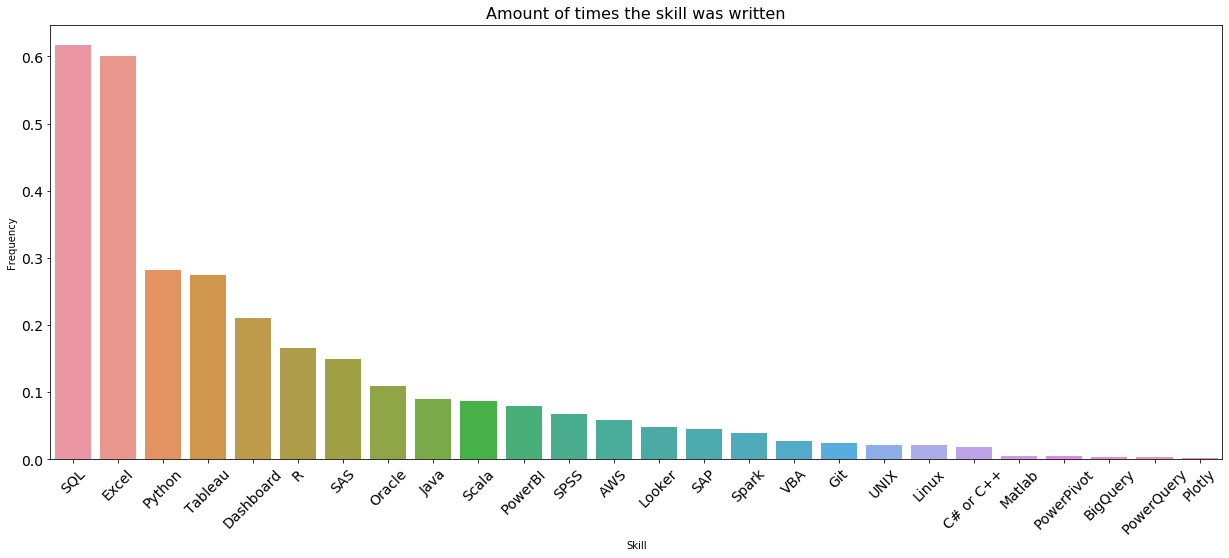

In [21]:
# Plot a barchart of skills
plt.figure(figsize=(21, 8))
sns.barplot(x='skill', y='freq', data=skills)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title("Amount of times the skill was written", fontdict={'size':16,})
plt.ylabel("Frequency")
plt.xlabel("Skill");

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]),
 <a list of 10 Text yticklabel objects>)

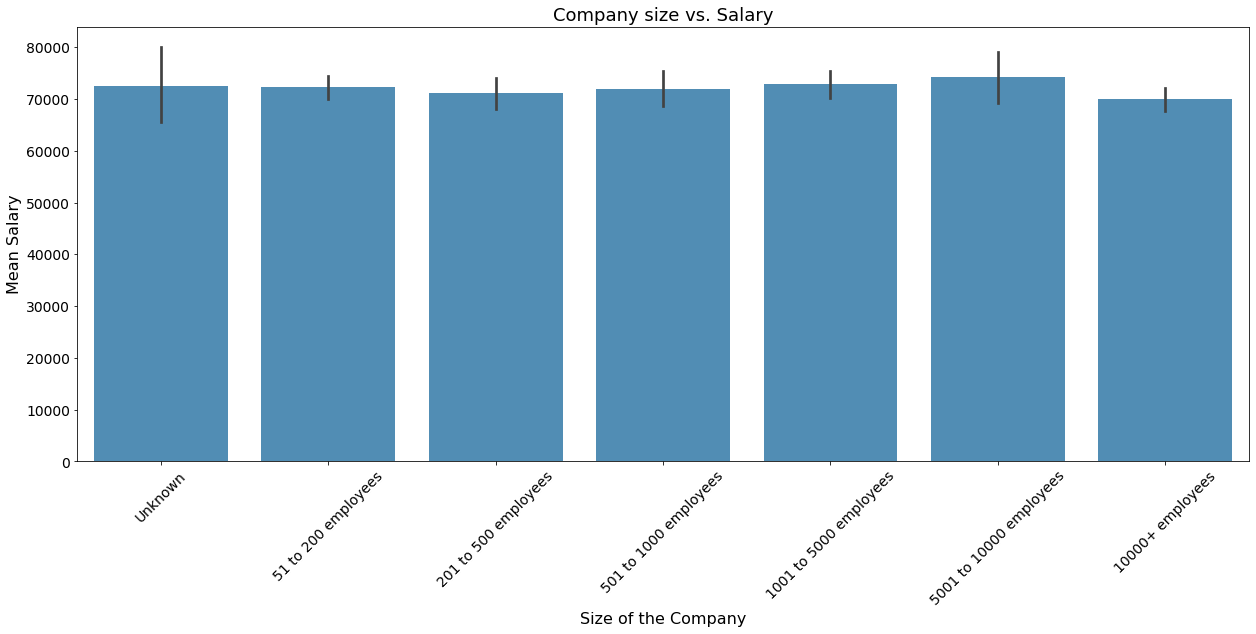

In [22]:
plt.figure(figsize=(21,8))
order=['Unknown','51 to 200 employees','201 to 500 employees','501 to 1000 employees','1001 to 5000 employees','5001 to 10000 employees','10000+ employees']
sns.barplot(x='Size',y='Average Salary',data=src,order=order,color='#4090c5')
plt.title("Company size vs. Salary",fontsize=18)
plt.ylabel('Mean Salary',fontsize=16)
plt.xlabel('Size of the Company',fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)